# **Data Science Intern at Infopillar Solutions Pvt Ltd - Virtual Internship Program**

---



# NAME : LAKSHMI MOUNIKA KELAM ,
Department : MS(Pharm)Pharmacoinformatics ,
institu:NIPER Kolkata
Contact no : +916302957118 ,
Email : mounikakelam123@gmail.com**

# **Level : Begginer**

# **Task 2 : Loan Prediction using Machine Learning**

### Importing  library

In [69]:
from sklearn import linear_model
from sklearn.datasets import load_boston

# loading the dataset

In [70]:
import pandas as pd
boston = load_boston()
print(boston.data.shape)

(506, 13)


# creating the dataframe

In [71]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# adding the target variable (MV)  values in dataframe

In [72]:
data['MV'] = pd.Series(data=boston.target, index=data.index)
data.describe() #get some basic stats on the dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [73]:
#Load the independent variables (the x1, x2, etc.) into a dataframe object called 'X'. Similarly for the dependent variable 'Y'
X = data.drop('MV', axis = 1) #define independent predictor set (excluding the dependent variable)
Y = data['MV'] #define the target values (i.e. the dependent variable)

# data spliting in 4:1 ratio

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


# development of LinearRegression model

In [75]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

# prediction of the model

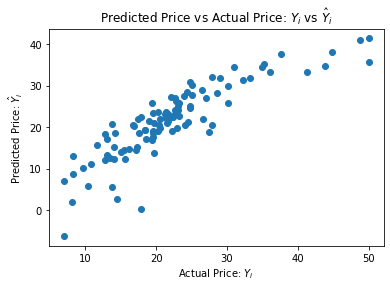

In [76]:
Y_pred_train = reg.predict(X_train) #predictions on training data
Y_pred = reg.predict(X_test) #predictions on testing data
# We plot predicted Y (y-axis) against actual Y (x-axis). Perfect predictions will lie on the diagonal. We see the diagonal trend, suggesting a 'good' fit
import matplotlib.pyplot as plt
plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual Price: $Y_i$")
plt.ylabel("Predicted Price: $\hat{Y}_i$")
plt.title("Predicted Price vs Actual Price: $Y_i$ vs $\hat{Y}_i$")
plt.show()

# statistics of model

In [77]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test,Y_pred)
print('Mean Squared Error: ',mse)
rsq = r2_score(Y_train,Y_pred_train)
print('R-square, Training: ',rsq)
rsq = r2_score(Y_test,Y_pred)
print('R-square, Testing: ',rsq)


Mean Squared Error:  20.869292183770526
R-square, Training:  0.7383393920590519
R-square, Testing:  0.7334492147453112


# coefficients of the model

In [78]:
print('Intercept: ',reg.intercept_) # This gives us the intercept term
print('Coefficients: \n',reg.coef_) # This gives us the coefficients (in the case of this model, just one coefficient)

Intercept:  37.91248700975083
Coefficients: 
 [-1.30799852e-01  4.94030235e-02  1.09535045e-03  2.70536624e+00
 -1.59570504e+01  3.41397332e+00  1.11887670e-03 -1.49308124e+00
  3.64422378e-01 -1.31718155e-02 -9.52369666e-01  1.17492092e-02
 -5.94076089e-01]


# Thank you

I hope you found the project useful and interesting. Feel free to contact me if you have any queries or suggestions.

This notebook was developed by [LAKSHMI MOUNIKA ](https://www.linkedin.com/in/mounika-kelam-a9179b196/).